In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np

In [3]:
X_label='Train_EnvstepsSoFar'
Y_label='Train_AverageReturn'
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/homework_fall2022/hw4/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def check(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    X, Y = getXY(exp_name, X_label, Y_label)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [6]:
q2name = "hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_02-11-2022_00-21-04"
q31name = "hw4_q3_obstacles_obstacles-cs285-v0_02-11-2022_00-31-58"
q32name = "hw4_q3_reacher_reacher-cs285-v0_02-11-2022_00-37-33"
q33name = "hw4_q3_cheetah_cheetah-cs285-v0_02-11-2022_01-07-04"
q34name = "hw4_q3_obstacles_obstacles-cs285-v0_02-11-2022_20-28-02"
q3test1 = "hw4_test_q3_obstacles_obstacles-cs285-v0_02-11-2022_21-45-51"

q41name = "hw4_q4_reacher_horizon5_reacher-cs285-v0_02-11-2022_20-39-11"
q42name = "hw4_q4_reacher_horizon15_reacher-cs285-v0_02-11-2022_20-43-44"
q43name = "hw4_q4_reacher_horizon30_reacher-cs285-v0_02-11-2022_20-55-10"
q44name = "hw4_q4_reacher_numseq100_reacher-cs285-v0_02-11-2022_21-17-09"
q45name = "hw4_q4_reacher_numseq1000_reacher-cs285-v0_02-11-2022_21-23-34"
q46name = "hw4_q4_reacher_ensemble1_reacher-cs285-v0_02-11-2022_21-31-56"
q47name = "hw4_q4_reacher_ensemble3_reacher-cs285-v0_02-11-2022_21-35-18"
q48name = "hw4_q4_reacher_ensemble5_reacher-cs285-v0_02-11-2022_21-44-09"

q51name = "hw4_q5_cheetah_random_cheetah-cs285-v0_03-11-2022_11-26-00"
q52name = "hw4_q5_cheetah_cem_2_cheetah-cs285-v0_02-11-2022_23-20-47"
q53name = "hw4_q5_cheetah_cem_4_cheetah-cs285-v0_03-11-2022_12-04-49"

q61name = "hw4_q6_cheetah_rlenl0_cheetah-cs285-v0_03-11-2022_00-33-55"
q62name = "hw4_q6_cheetah_rlen1_cheetah-cs285-v0_03-11-2022_00-37-13"
q63name = "hw4_q6_cheetah_rlen10_cheetah-cs285-v0_03-11-2022_00-50-01"

# incomplete
q51incomplete = "hw4_q5_cheetah_random_cheetah-cs285-v0_02-11-2022_23-15-56"
q52secondrun = "hw4_q5_cheetah_cem_2_cheetah-cs285-v0_03-11-2022_11-38-44"
q53incomplete = "hw4_q5_cheetah_cem_4_cheetah-cs285-v0_02-11-2022_23-53-56"
q6test = "hw4_q6_cheetah_rlen10_cheetah-cs285-v0_03-11-2022_00-18-16"


# HW4 Report

## Problem 1

### q1_cheetah_n5_arch2x250
![title](../../data/hw4_q1_cheetah_n5_arch2x250_cheetah-cs285-v0_02-11-2022_00-16-56/itr_0_predictions.png)
### q1_cheetah_n500_arch1x32
![title](../../data/hw4_q1_cheetah_n500_arch1x32_cheetah-cs285-v0_01-11-2022_11-42-29/itr_0_predictions.png)
### q1_cheetah_n500_arch2x250
![title](../../data/hw4_q1_cheetah_n500_arch2x250_cheetah-cs285-v0_02-11-2022_00-17-03/itr_0_predictions.png)

The last model performs the best because we have a large enough model with more training iterations

## Problem 2

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0.5, 1.0, 'Problem 2')

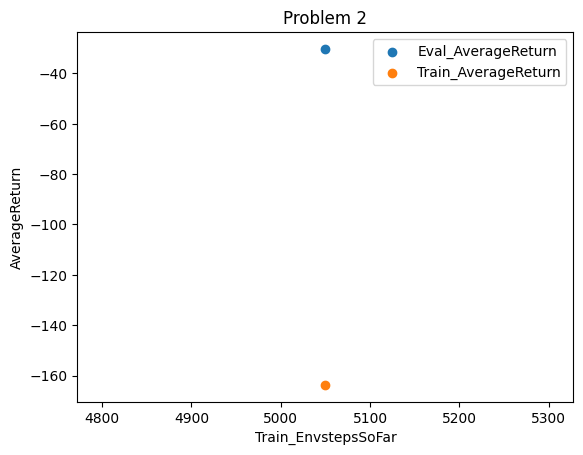

In [6]:
X_label='Train_EnvstepsSoFar'
Y1_label='Eval_AverageReturn'
Y2_label='Train_AverageReturn'

exp_names = [q2name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y1_label)
    X2, Y2 = getXY(exp_name, X_label=X_label, Y_label=Y2_label)
    plt.scatter(X1, Y1, label=Y1_label)
    plt.scatter(X2, Y2, label=Y2_label)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 2")

## Problem 3

Text(0.5, 1.0, 'Problem 3')

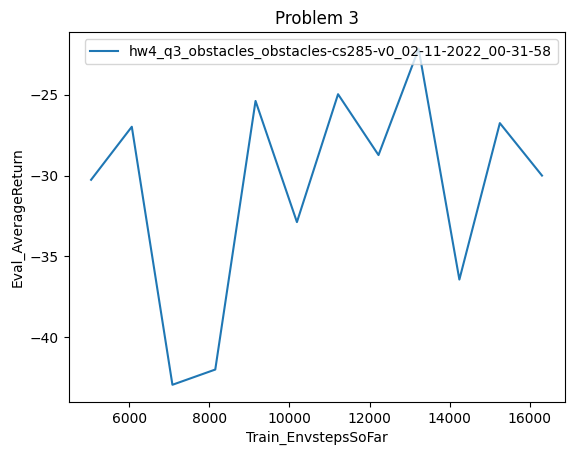

In [12]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q31name, q32name, q33name, q3test1]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 3")

## Problem 4

Text(0.5, 1.0, 'Problem 4: Horizon')

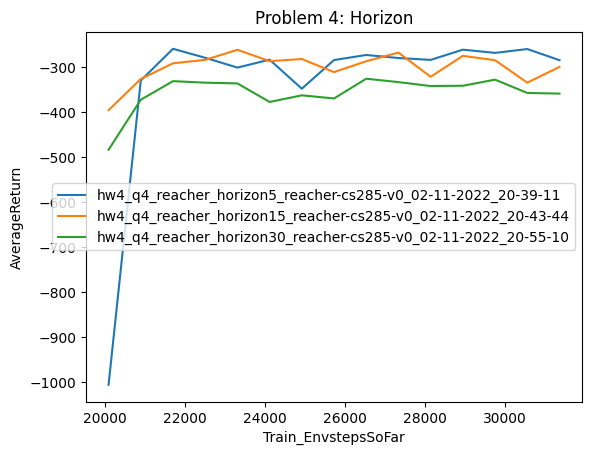

In [19]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q41name, q42name, q43name]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 4: Horizon")

Text(0.5, 1.0, 'Problem 4: number of candidate actiion sequences')

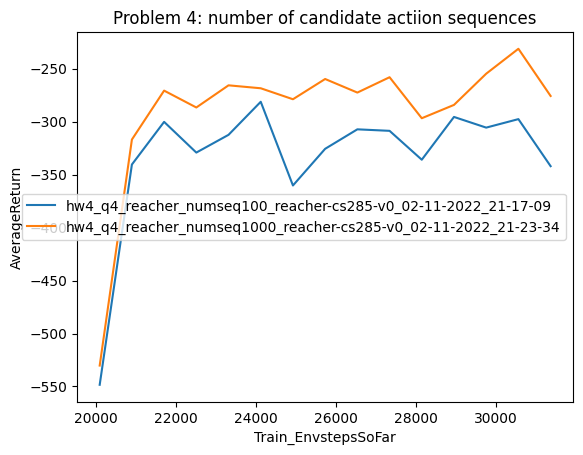

In [21]:
exp_names = [q44name, q45name]
for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 4: number of candidate actiion sequences")

Text(0.5, 1.0, 'Problem 4: ensemble size')

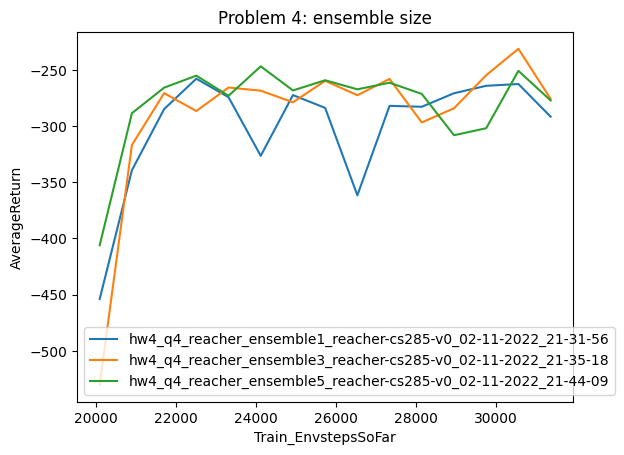

In [22]:
exp_names = [q46name, q47name, q48name]
for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 4: ensemble size")

## Problem 5

Text(0.5, 1.0, 'Problem 5')

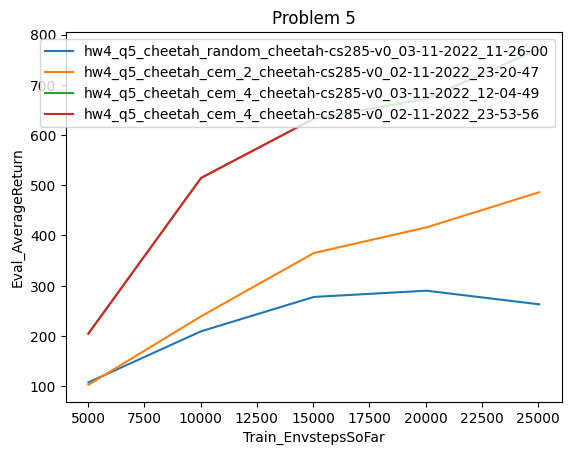

In [19]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q51name, q52name, q53name, q53incomplete]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 5")

In [18]:
check(q53name, X_label, Y_label)

Iteration 0 | Train steps: 5010 | Return: 204.62315368652344
Iteration 1 | Train steps: 10020 | Return: 514.4876708984375
Iteration 2 | Train steps: 15030 | Return: 632.50390625
Iteration 3 | Train steps: 20040 | Return: 671.9439697265625
Iteration 4 | Train steps: 25050 | Return: 771.5823974609375


# Problem 6

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0.5, 1.0, 'Problem 6')

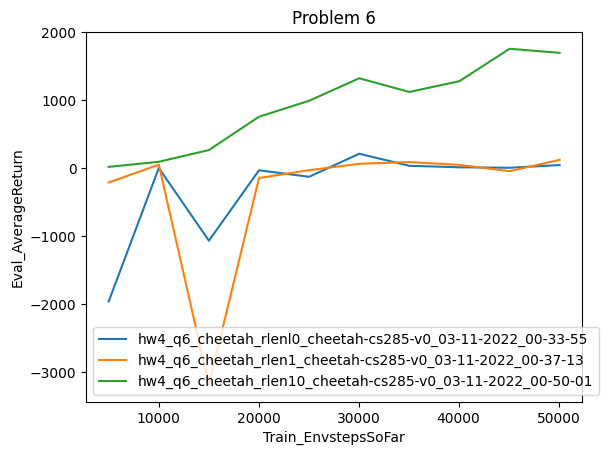

In [5]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q61name, q62name, q63name]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 6")

### We see that longer rollout length leads to lower variances and better average return in general. 